### Clase 5

La derivada asimétrica nos permite calcular las derivadas  en los extremos.

**Prácticamente cualquier cosa numérica van a ser vectores o matrices** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Derivada de Euler

$$
 f'(x_i) \approx \frac{f(x_{i+1})-f(x_{i})}{x_{i+1} - x_i}
$$

El último punto se puede calcular como

$$
 f'(x_{N}) \approx \frac{f(x_{N}) - f(x_{N-1})}{x_{i+1} - x_i}
$$

In [2]:
def derivada_Euler(f, x):
    h, df = x[1] - [0], np.zeros_like(f)
    for i in range(len(f) - 1):
        df[i] = f[i+1] - f[i]
    # Vi a los ojos de Dios y se horrorizó al ver que python permite meter índices negativos
    df[-1] = f[-1] - f[-2]
    return df / h

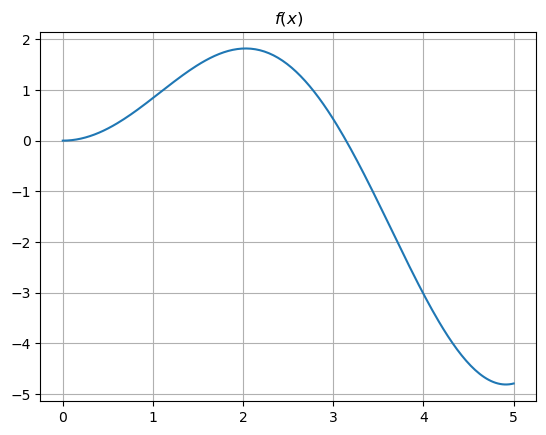

In [3]:
x = np.linspace(0,5,200)
y = x*np.sin(x)

plt.title(r"$f(x)$")
plt.plot(x,y)
plt.grid(),
plt.show()

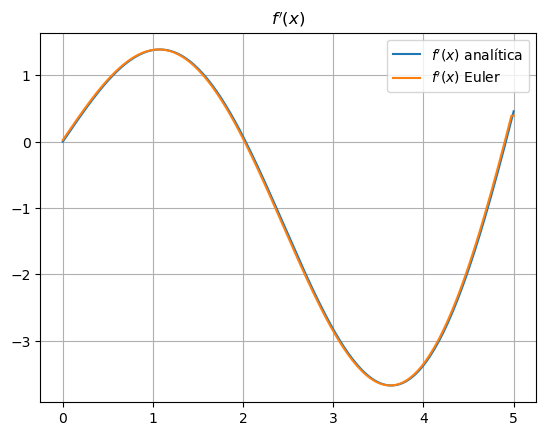

In [4]:
dy = np.sin(x) + x*np.cos(x)
dy_euler = derivada_Euler(y,x)

plt.title(r"$f'(x)$")
plt.plot(x,dy, label=r"$f'(x)$ analítica")
plt.plot(x,dy_euler, label=r"$f'(x)$ Euler")
plt.grid(), plt.legend(),
plt.show()

### Derivada simétrica (de Taylor) con $h^2$

$$
 f'(x_i) \approx \frac{f(x_{i+1})-f(x_{i-1})}{ 2 (x_{i+1} - x_{i-1})}
$$

Derivadas asimétricas

$$
 f'(x_{0}) \approx \frac{1}{x_{1} - x_{0}} \left( -\frac{1}{2}f(x_{2}) + f(x_{1}) - \frac{3}{2}f(x_{0})  \right)
$$

$$
 f'(x_{N}) \approx -\frac{1}{x_{N} - x_{N-1}} \left( -\frac{1}{2}f(x_{N-2}) + f(x_{N-1}) - \frac{3}{2}f(x_{N})  \right)
$$

In [5]:
def derivada_h2(f, x):
    h_2, df = x[2] - [0], np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = f[i+1] - f[i-1]

    # Nótese que se multiplicaron los coefs anteriores por 2 porque la ec. de arriba divide por 2h
    df[0] = -f[2] + 4*f[1] - 3*f[0]
    df[-1] = f[-3] - 4*f[-2] + 3*f[-1]
    return df / h_2

In [6]:
%time
dy_h2 = derivada_h2(y,x)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.81 μs


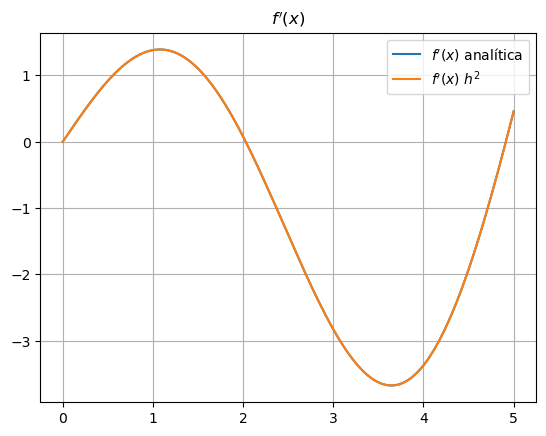

In [7]:
plt.title(r"$f'(x)$")
plt.plot(x,dy, label=r"$f'(x)$ analítica")
plt.plot(x,dy_h2, label=r"$f'(x)$ $h^2$")
plt.grid(), plt.legend(),
plt.show()

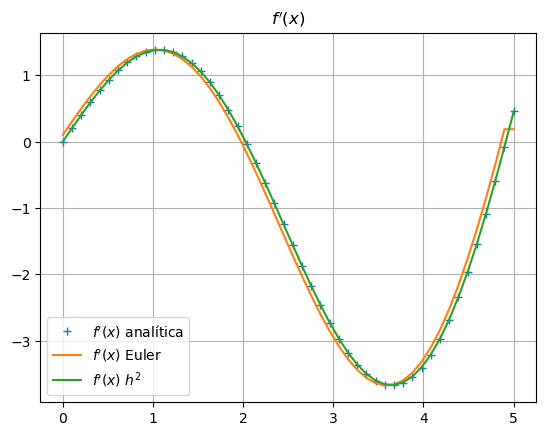

In [8]:
x = np.linspace(0,5,50)
y = x*np.sin(x)

dy = np.sin(x) + x*np.cos(x)
dy_euler = derivada_Euler(y,x)
dy_h2 = derivada_h2(y,x)

plt.title(r"$f'(x)$")
plt.plot(x,dy, '+' ,label=r"$f'(x)$ analítica")
plt.plot(x,dy_euler, label=r"$f'(x)$ Euler")
plt.plot(x,dy_h2, label=r"$f'(x)$ $h^2$")
plt.grid(), plt.legend(),
plt.show()

Gráficas de error

Max err: 0.2707783227165114 0.008483881906918622


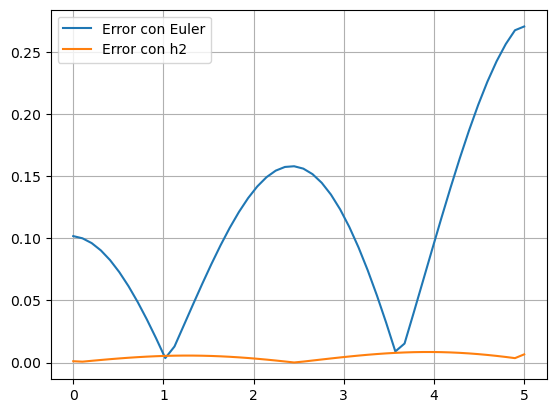

In [9]:
error_euler = abs(dy - dy_euler)
error_h2 = abs(dy - dy_h2)
print('Max err:', error_euler.max(), error_h2.max())

plt.plot(x,error_euler, label='Error con Euler')
plt.plot(x,error_h2, label='Error con h2')
plt.grid(), plt.legend(),
plt.show()

### Derivada simétrica con $h^4$

$$
 f'(x_i) \approx \frac{1}{12 h} \left(-f(x_{i+2}) + 8 f(x_{i+1}) - 8 f(x_{i-1}) + f(x_{i-2}) \right) 
$$

Puntos iniciales $i=0,1$

$$
 f'(x_{i}) \approx \frac{1}{12 h} \left( -25 f(x_{i}) + 48 f(x_{i+1}) - 36 f(x_{i+2} + 16 f(x_{i+3}) - 3 f(x_{i+4})  \right)
$$

$$
 f'(x_{N}) \approx -\frac{1}{x_{N} - x_{N-1}} \left( -\frac{1}{2}f(x_{N-2}) + f(x_{N-1}) - \frac{3}{2}f(x_{N})  \right)
$$

Puntos finales $i=N,N-1$

In [10]:
def derivada_h4(f, x):
    h_12, df = 12*(x[1] - [0]), np.zeros_like(f)
    for i in range(2,len(x)-2):
        df[i] = - f[i+2] + 8*f[i+1] - 8*f[i-1] + f[i-2]

    df[0] = -25*f[0] + 48*f[1] - 36*f[2] + 16*f[3] - 3*f[4]
    df[1] = -25*f[1] + 48*f[2] - 36*f[3] + 16*f[4] - 3*f[5]
    
    df[-1] = 25*f[-1] - 48*f[-2] + 36*f[-3] - 16*f[-4] + 3*f[-5]
    df[-2] = 25*f[-2] - 48*f[-3] + 36*f[-4] - 16*f[-5] + 3*f[-6]

    return df / h_12

In [11]:
%time
dy_h4 = derivada_h4(y,x)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.1 μs


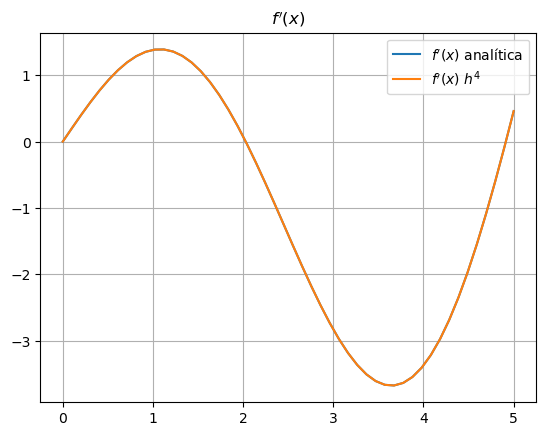

In [12]:
plt.title(r"$f'(x)$")
plt.plot(x,dy, label=r"$f'(x)$ analítica")
plt.plot(x,dy_h4, label=r"$f'(x)$ $h^4$")
plt.grid(), plt.legend(),
plt.show()

Max err: 0.008483881906918622 0.00010656580837752061


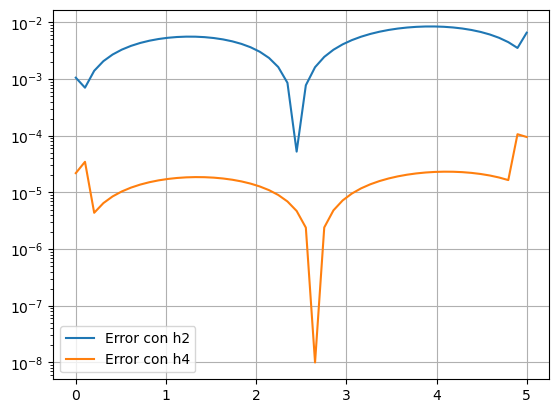

In [13]:
error_h2 = abs(dy - dy_h2)
error_h4 = abs(dy - dy_h4)
print('Max err:', error_h2.max(), error_h4.max())

plt.semilogy(x,error_h2, label='Error con h2')
plt.semilogy(x,error_h4, label='Error con h4')
plt.grid(), plt.legend(),
plt.show()